In [104]:
import numpy as np
import itertools
from itertools import permutations
from itertools import combinations
from itertools import product
import matplotlib.pyplot as plt
import sympy as sp
import copy
from itertools import chain

Deltapp = [1, [1, 1, 1], "d2"]
DeltappB = [1, [1.2, 1.2, 1.2], "d2"]
Deltap = [sp.sqrt(3), [1, 1, 2], "d1"]
DeltapB = [sp.sqrt(3), [2.2, 1.2, 1.2], "d1"]
Delta0 = [sp.sqrt(3), [1, 2, 2], "d0"]
Delta0B = [sp.sqrt(3), [2.2, 2.2, 1.2], "d0"]
Deltam = [1, [2, 2, 2], "d2"]
DeltamB = [1, [2.2, 2.2, 2.2], "d2"]
Sigmap = [1, [1, 1, 3], "s1"]
SigmapB = [1, [3.2, 1.2, 1.2], "s1"]
Sigma0 = [sp.sqrt(2), [1, 2, 3], "s0"]
Sigma0B = [sp.sqrt(2), [3.2, 2.2, 1.2], "s0"]
Sigmam = [1, [2, 2, 3], "s1"]
SigmamB = [1, [3.2, 2.2, 2.2], "s1"]
Nucleonp = [1, [1, 1, 2], "n"]
NucleonpB = [1, [2.2, 1.2, 1.2], "n"]
Nucleon0 = [-1, [2, 2, 1], "n"]
Nucleon0B = [-1, [1.2, 2.2, 2.2], "n"]
Xi0 = [1, [3, 3, 1], "x"]
Xi0B = [1, [1.2, 3.2, 3.2], "x"]
Xim = [1, [3, 3, 2], "x"]
XimB = [1, [2.2, 3.2, 3.2], "x"]
Lambda0 = [1, [1, 2, 3], "l"]
Lambda0B = [1, [3.2, 2.2, 1.2], "l"]
Omegam = [1, [3, 3, 3], "o"]
OmegamB = [1, [3.2, 3.2, 3.2], "o"]
Pip = [1, [2.2, 1], "M"]
PipB = [1, [1.2, 2], "M"]
Pi00 = [sp.sqrt(2)/2, [2.2, 2], "M"]
Pi01 = [-sp.sqrt(2)/2, [1.2, 1], "M"]
Eta00 = [sp.sqrt(2)/2, [2.2, 2], "M"]
Eta01 = [-sp.sqrt(2)/2, [1.2, 1], "M"]
SuPositions = {'Pi0S': {1: Pi00, 2: Pi01}, 'Eta0S': {1: Eta00, 2: Eta01}}
Pi0 = [[[1/(sp.sqrt(2)), [2.2, 2]], 'M'], [[-1/(sp.sqrt(2)), [1.2, 1]], 'M']]
Pi0B = [[[1/(sp.sqrt(2)), [2.2, 2]], 'M'], [[-1/(sp.sqrt(2)), [1.2, 1]], 'M']]
Eta0 = [[[1, [2.2, 2]], 'M'], [[1, [1.2, 1]], 'M']]
Eta0B = [[[1, [2.2, 2]], 'M'], [[1, [1.2, 1]], 'M']]
Pim = [-1, [1.2, 2], "M"]
PimB = [-1, [2.2, 1], "M"]
Kaonp = [1, [3.2, 1], "M"]
KaonpB = [1, [1.2, 3], "M"]
Kaonm = [1, [3.2, 2], "M"]
KaonmB = [1, [2.2, 3], "M"]
Phi0 = [1, [3.2, 3], "M"]
Phi0B = [1, [3.2, 3], "M"]

################## Definitions for the unsimplified case with two particle-operators ##################

hadron_operatorsB = {'Delta': {3/2: DeltappB, 1/2: DeltapB, -1/2: Delta0B, -3/2: DeltamB},
                    'Sigma': {1: SigmapB, 0: Sigma0B, -1: SigmamB},
                    'Nucleon': {1/2: NucleonpB, -1/2: Nucleon0B},
                    'Xi': {1/2: Xi0B, -1/2: XimB},
                    'Lambda': {0: Lambda0B},
                    'Omega': {0: OmegamB},
                    'Pi': {1: PipB, 0: 'Pi0S', -1: PimB},
                    'Kaon': {1/2: KaonpB, -1/2: KaonmB},
                    'Phi': {0: Phi0B},
                    'Eta': {0: 'Eta0S'},
                        }
hadron_operators = {'Delta': {3/2: Deltapp, 1/2: Deltap, -1/2: Delta0, -3/2: Deltam},
                        'Sigma': {1: Sigmap, 0: Sigma0, -1: Sigmam},
                         'Nucleon': {1/2: Nucleonp, -1/2: Nucleon0},
                         'Xi': {1/2: Xi0, -1/2: Xim},
                         'Lambda': {0: Lambda0},
                         'Omega': {0: Omegam},
                    'Pi': {1: Pip, 0: Pi0, -1: Pim},
                    'Kaon': {1/2: Kaonp, -1/2: Kaonm},
                    'Phi': {0: Phi0},
                    'Eta': {0: Eta0},
                        }


In [105]:
def two_hadron_operatorB(rep, I, I3, A, B):

    
    #### 1/2 X 1/2 Representation


    if rep == [1/2, 1/2]:
        Ah = hadron_operatorsB[A][1/2]
        Amh = hadron_operatorsB[A][-1/2]
        Bmh = hadron_operatorsB[B][-1/2]
        Bh = hadron_operatorsB[B][1/2]

        if I == 0 and I3 == 0:
            the_operator = [[Ah[0] * Bmh[0], list(chain(Ah[1],Bmh[1])), [Ah[2],Bmh[2]] ], [-Amh[0] * Bh[0], list(chain(Amh[1],Bh[1]))], [Amh[2],Bh[2]] ]
            return the_operator

        if I == 1 and I3 == 1:
            the_operator = [Ah[0] * Bh[0], list(chain(Ah[1],Bh[1])), [Ah[2],Bh[2]] ]
            return the_operator

        if I == 1 and I3 == 0:
            the_operator = [[Ah[0] * Bmh[0], list(chain(Ah[1],Bmh[1])), [Ah[2],Bmh[2]] ], [Amh[0] * Bh[0], list(chain(Amh[1],Bh[1]))], [Amh[2],Bh[2]] ]
            return the_operator

        if I == 1 and I3 == -1:
            the_operator = [Amh[0] * Bmh[0], list(chain(Amh[1],Bmh[1])), [Amh[2],Bmh[2]] ]
            return the_operator

    
    #### 1/2 X 1 Representation


    if rep == [1/2, 1]:
        Ah = hadron_operatorsB[A][1/2]
        Amh = hadron_operatorsB[A][-1/2]
        Bm1 = hadron_operatorsB[B][-1]
        B0 = hadron_operatorsB[B][0]
        B1 = hadron_operatorsB[B][1]
        
        if B0 == 'Eta0S' or B0 == 'Pi0S':
            B0M1 = SuPositions[B0][1]
            B0M2 = SuPositions[B0][2]

            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [Ah[0] * B0M1[0], list(chain(Ah[1],B0M1[1])), [Ah[2],B0M1[2]] ],
                    [Ah[0] * B0M2[0], list(chain(Ah[1],B0M2[1])), [Ah[2],B0M2[2]] ], [- sp.sqrt(2) * Amh[0] * B1[0], list(chain(Amh[1],B1[1]))], [Amh[2],B1[2]] ]
                return the_operator

            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [Amh[0] * B0M1[0], list(chain(Amh[1],B0M1[1])), [Amh[2],B0M1[2]] ], [Amh[0] * B0M2[0], list(chain(Amh[1],B0M2[1])), [Amh[2],B0M2[2]] ]
                    , [- sp.sqrt(2) * Ah[0] * Bm1[0], list(chain(Ah[1],Bm1[1]))], [Ah[2],Bm1[2]],
                               ]
                return the_operator
    
            if I == 3/2 and I3 == 3/2:
                the_operator = [Ah[0] * B1[0], list(chain(Ah[1],B1[1])), [Ah[2],B1[2]] ]
                return the_operator
    
            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [sp.sqrt(2) * Ah[0] * B0M1[0], list(chain(Ah[1],B0M1[1])), [Ah[2],B0M1[2]] ],
                    [sp.sqrt(2) * Ah[0] * B0M2[0], list(chain(Ah[1],B0M2[1])), [Ah[2],B0M2[2]] ], [Amh[0] * B1[0], list(chain(Amh[1],B1[1]))], [Amh[2],B1[2]] ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(2) * Amh[0] * B0M1[0], list(chain(Amh[1],B0M1[1])), [Amh[2],B0M1[2]] ],
                    [sp.sqrt(2) * Amh[0] * B0M2[0], list(chain(Amh[1],B0M2[1])), [Amh[2],B0M2[2]] ], [Ah[0] * B1[0], list(chain(Ah[1],B1[1]))], [Ah[2],B1[2]] ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [Amh[0] * Bm1[0], list(chain(Amh[1],Bm1[1])), [Amh[2],BM1[2]] ]
                return the_operator

        if B0 != 'Eta0S' and B0 != 'Pi0S':
            
            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [Ah[0] * B0[0], list(chain(Ah[1],B0[1])), [Ah[2],B0[2]] ],
                    [- sp.sqrt(2) * Amh[0] * B1[0], list(chain(Amh[1],B1[1]))], [Amh[2],B1[2]] ]
                return the_operator

            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [Amh[0] * B0[0], list(chain(Amh[1],B0[1])), [Amh[2],B0[2]] ]
                    , [- sp.sqrt(2) * Ah[0] * Bm1[0], list(chain(Ah[1],Bm1[1]))], [Ah[2],Bm1[2]],
                               ]
                return the_operator
    
            if I == 3/2 and I3 == 3/2:
                the_operator = [Ah[0] * B1[0], list(chain(Ah[1],B1[1])), [Ah[2],B1[2]] ]
                return the_operator
    
            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [sp.sqrt(2) * Ah[0] * B0[0], list(chain(Ah[1],B0[1])), [Ah[2],B0[2]] ], [Amh[0] * B1[0], list(chain(Amh[1],B1[1]))], [Amh[2],B1[2]] ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(2) * Amh[0] * B0[0], list(chain(Amh[1],B0[1])), [Amh[2],B0[2]] ], [Ah[0] * B1[0], list(chain(Ah[1],B1[1]))], [Ah[2],B1[2]] ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [Amh[0] * Bm1[0], list(chain(Amh[1],Bm1[1])), [Amh[2],Bm1[2]] ]
                return the_operator

    if rep == [1, 1]:
        Am1 = hadron_operatorsB[A][-1]
        A0 = hadron_operatorsB[A][0]
        A1 = hadron_operatorsB[A][1]
        Bm1 = hadron_operatorsB[B][-1]
        B0 = hadron_operatorsB[B][0]
        B1 = hadron_operatorsB[B][1]

        if B0 == 'Eta0S' or B0 == 'Pi0S':
            B0M1 = SuPositions[B0][1]
            B0M2 = SuPositions[B0][2]
            if A0 == 'Eta0S' or A0 == 'Pi0S':
                A0M1 = SuPositions[A0][1]
                A0M2 = SuPositions[A0][2]

                if I == 0 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                        [-A0M1[0] * B0M1[0], list(chain(A0M1[1],B0M1[1])), [A0M1[2],B0M1[2]]],
                        [-A0M2[0] * B0M1[0], list(chain(A0M2[1],B0M1[1])), [A0M2[2],B0M1[2]]],
                        [-A0M2[0] * B0M2[0], list(chain(A0M2[1],B0M2[1])), [A0M2[2],B0M2[2]]],
                        [-A0M1[0] * B0M2[0], list(chain(A0M1[1],B0M2[1])), [A0M1[2],B0M2[2]]]
                                 ]
                    return the_operator
                if I == 1 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(A1[1],B0M1[1])), [A1[2],B0M1[2]]],
                        [A1[0] * B0M2[0], list(chain(A1[1],B0M2[1])), [A1[2],B0M2[2]]],
                        [-A0M1[0] * B1[0], list(chain(A0M1[1],B1[1])), [A0M1[2],B1[2]]],
                        [-A0M2[0] * B1[0], list(chain(A0M2[1],B1[1])), [A0M2[2],B1[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [-Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == -1:
                    the_operator = [
                        [-Am1[0] * B0M1[0], list(chain(Am1[1],B0M1[1])), [Am1[2],B0M1[2]]],
                        [-Am1[0] * B0M2[0], list(chain(Am1[1],B0M2[1])), [Am1[2],B0M2[2]]],
                        [A0M1[0] * Bm1[0], list(chain(A0M1[1],Bm1[1])), [A0M1[2],Bm1[2]]],
                        [A0M2[0] * Bm1[0], list(chain(A0M2[1],Bm1[1])), [A0M2[2],Bm1[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 2:
                    the_operator = [A1[0] * B1[0], list(chain(A1[1],B1[1])), [A1[2],B1[2]]]
                    return the_operator

                if I == 2 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(A1[1],B0M1[1])), [A1[2],B0M1[2]]],
                        [A1[0] * B0M2[0], list(chain(A1[1],B0M2[1])), [A1[2],B0M2[2]]],
                        [A0M1[0] * B1[0], list(chain(A0M1[1],B1[1])), [A0M1[2],B1[2]]],
                        [A0M2[0] * B1[0], list(chain(A0M2[1],B1[1])), [A0M2[2],B1[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                        [2 * A0M1[0] * B0M1[0], list(chain(A0M1[1],B0M1[1])), [A0M1[2],B0M1[2]]],
                        [2 * A0M2[0] * B0M1[0], list(chain(A0M2[1],B0M1[1])), [A0M2[2],B0M1[2]]],
                        [2 * A0M2[0] * A0M2[0], list(chain(A0M2[1],A0M2[1])), [A0M2[2],A0M2[2]]],
                        [2 * A0M1[0] * B0M2[0], list(chain(A0M1[1],B0M2[1])), [A0M1[2],B0M2[2]]]
                                 ]
                    return the_operator

                if I == 2 and I3 == -1:
                    the_operator = [
                        [Am1[0] * B0M1[0], list(chain(Am1[1],B0M1[1])), [Am1[2],B0M1[2]]],
                        [Am1[0] * B0M2[0], list(chain(Am1[1],B0M2[1])), [Am1[2],B0M2[2]]],
                        [A0M1[0] * BM1[0], list(chain(A0M1[1],BM1[1])), [A0M1[2],BM1[2]]],
                        [A0M2[0] * BM1[0], list(chain(A0M2[1],BM1[1])), [A0M2[2],BM1[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == -2:
                    the_operator = [Am1[0] * Bm1[0], list(chain(Am1[1],Bm1[1])), [Am1[2],Bm1[2]]]
                    return the_operator

            if A0 != 'Eta0S' or A0 != 'Pi0S':

                if I == 0 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                        [-A0[0] * B0M1[0], list(chain(A0[1],B0M1[1])), [A0[2],B0M1[2]]],
                        [-A0[0] * B0M2[0], list(chain(A0[1],B0M2[1])), [A0[2],B0M2[2]]]
                                 ]
                    return the_operator
                if I == 1 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(A1[1],B0M1[1])), [A1[2],B0M1[2]]],
                        [A1[0] * B0M2[0], list(chain(A1[1],B0M2[1])), [A1[2],B0M2[2]]],
                        [-A0[0] * B1[0], list(chain(A0[1],B1[1])), [A0[2],B1[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [-Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == -1:
                    the_operator = [
                        [-Am1[0] * B0M1[0], list(chain(Am1[1],B0M1[1])), [Am1[2],B0M1[2]]],
                        [-Am1[0] * B0M2[0], list(chain(Am1[1],B0M2[1])), [Am1[2],B0M2[2]]],
                        [A0[0] * Bm1[0], list(chain(A0[1],Bm1[1])), [A0[2],Bm1[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 2:
                    the_operator = [A1[0] * B1[0], list(chain(A1[1],B1[1])), [A1[2],B1[2]]]
                    return the_operator

                if I == 2 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(A1[1],B0M1[1])), [A1[2],B0M1[2]]],
                        [A1[0] * B0M2[0], list(chain(A1[1],B0M2[1])), [A1[2],B0M2[2]]],
                        [A0[0] * B1[0], list(chain(A0[1],B1[1])), [A0[2],B1[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                        [2 * A0[0] * B0M1[0], list(chain(A0[1],B0M1[1])), [A0[2],B0M1[2]]],
                        [2 * A0[0] * B0M2[0], list(chain(A0[1],B0M2[1])), [A0[2],B0M2[2]]]
                                 ]
                    return the_operator

                if I == 2 and I3 == -1:
                    the_operator = [
                        [Am1[0] * B0M1[0], list(chain(Am1[1],B0M1[1])), [Am1[2],B0M1[2]]],
                        [Am1[0] * B0M2[0], list(chain(Am1[1],B0M2[1])), [Am1[2],B0M2[2]]],
                        [A0[0] * BM1[0], list(chain(A0[1],BM1[1])), [A0[2],BM1[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == -2:
                    the_operator = [Am1[0] * Bm1[0], list(chain(Am1[1],Bm1[1])), [Am1[2],Bm1[2]]]
                    return the_operator

        if B0 != 'Eta0S' and B0 != 'Pi0S':
            if A0 == 'Eta0S' or A0 == 'Pi0S':
                A0M1 = SuPositions[A0][1]
                A0M2 = SuPositions[A0][2]
                if I == 0 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                        [-A0M1[0] * B0[0], list(chain(A0M1[1],B0[1])), [A0M1[2],B0[2]]],
                        [-A0M2[0] * B0[0], list(chain(A0M2[1],B0[1])), [A0M2[2],B0[2]]]
                                 ]
                    return the_operator

                if I == 1 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0[0], list(chain(A1[1],B0[1])), [A1[2],B0[2]]],
                        [-A0M1[0] * B1[0], list(chain(A0M1[1],B1[1])), [A0M1[2],B1[2]]],
                        [-A0M2[0] * B1[0], list(chain(A0M2[1],B1[1])), [A0M2[2],B1[2]]]
                    ]
                    return the_operator

                if I == 1 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [-Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]]
                        ]
                    return the_operator
                if I == 1 and I3 == -1:
                    the_operator = [
                        [-Am1[0] * B0[0], list(chain(Am1[1],B0[1])), [Am1[2],B0[2]]],
                        [A0M1[0] * Bm1[0], list(chain(A0M1[1],Bm1[1])), [A0M1[2],Bm1[2]]],
                        [A0M2[0] * Bm1[0], list(chain(A0M2[1],Bm1[1])), [A0M2[2],Bm1[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == 2:
                    the_operator = [A1[0] * B1[0], list(chain(A1[1],B1[1])), [A1[2],B1[2]]]
                    return the_operator
                if I == 2 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0[0], list(chain(A1[1],B0[1])), [A1[2],B0[2]]],
                        [A0M1[0] * B1[0], list(chain(A0M1[1],B1[1])), [A0M1[2],B1[2]]],
                        [A0M2[0] * B1[0], list(chain(A0M2[1],B1[1])), [A0M2[2],B1[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                        [2 * A0M1[0] * B0[0], list(chain(A0M1[1],B0[1])), [A0M1[2],B0[2]]],
                        [2 * A0M2[0] * B0[0], list(chain(A0M2[1],B0[1])), [A0M2[2],B0[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == -1:
                    the_operator = [
                        [Am1[0] * B0[0], list(chain(Am1[1],B0[1])), [Am1[2],B0[2]]],
                        [A0M1[0] * Bm1[0], list(chain(A0M1[1],Bm1[1])), [A0M1[2],Bm1[2]]],
                        [A0M2[0] * Bm1[0], list(chain(A0M2[1],Bm1[1])), [A0M2[2],Bm1[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == -2:
                    the_operator = [Am1[0] * Bm1[0], list(chain(Am1[1],Bm1[1])), [Am1[2],Bm1[2]]]
                    return the_operator
    
        if B0 != 'Eta0S' and B0 != 'Pi0S' and A0 != 'Eta0S' and A0 != 'Pi0S':
            if I == 0 and I3 == 0:
                the_operator = [
                    [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                    [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                    [-A0[0] * B0[0], list(chain(A0[1],B0[1])), [A0[2],B0[2]]]]
                return the_operator


            if I == 1 and I3 == 1:
                the_operator = [
                    [A1[0] * B0[0], list(chain(A1[1],B0[1])), [A1[2],B0[2]]],
                    [-A0[0] * B1[0], list(chain(A0[1],B1[1])), [A0[2],B1[2]]]]
                return the_operator

            if I == 1 and I3 == 0:
                the_operator = [
                    [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                    [-Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]]
                    ]
                return the_operator
            if I == 1 and I3 == -1:
                the_operator = [
                    [-Am1[0] * B0[0], list(chain(Am1[1],B0[1])), [Am1[2],B0[2]]],
                    [A0[0] * Bm1[0], list(chain(A0[1],Bm1[1])), [A0[2],Bm1[2]]]
                    ]
                return the_operator
            if I == 2 and I3 == 2:
                the_operator = [A1[0] * B1[0], list(chain(A1[1],B1[1])), [A1[2],B1[2]]]
                return the_operator
            if I == 2 and I3 == 1:
                the_operator = [
                    [A1[0] * B0[0], list(chain(A1[1],B0[1])), [A1[2],B0[2]]],
                    [A0[0] * B1[0], list(chain(A0[1],B1[1])), [A0[2],B1[2]]]]
                return the_operator
            if I == 2 and I3 == 0:
                the_operator = [
                    [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                    [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                    [2 * A0[0] * B0[0], list(chain(A0[1],B0[1])), [A0[2],B0[2]]]]
                return the_operator
            if I == 2 and I3 == -1:
                the_operator = [
                    [Am1[0] * B0[0], list(chain(Am1[1],B0[1])), [Am1[2],B0[2]]],
                    [A0[0] * Bm1[0], list(chain(A0[1],Bm1[1])), [A0[2],Bm1[2]]]]
                return the_operator
            if I == 2 and I3 == -2:
                the_operator = [Am1[0] * Bm1[0], list(chain(Am1[1],Bm1[1])), [Am1[2],Bm1[2]]]
                return the_operator


    if rep == [1/2, 3/2]:
        Amh = hadron_operatorsB[A][-1/2]
        Ah = hadron_operatorsB[A][1/2]
        Bm3h = hadron_operatorsB[B][-3/2]
        Bmh = hadron_operatorsB[B][-1/2]
        Bh = hadron_operatorsB[B][1/2]
        B3h = hadron_operatorsB[B][3/2]

        if I == 1 and I3 == 1:
            the_operator = [
                [Ah[0] * Bh[0], list(chain(Ah[1],Bh[1])), [Ah[2],Bh[2]]],
                [- sp.sqrt(3) * Amh[0] * B3h[0], list(chain(Amh[1],B3h[1])), [Amh[2],B3h[2]]]
            ]
            return the_operator

        if I == 1 and I3 == 0:
            the_operator = [
                [Ah[0] * Bmh[0], list(chain(Ah[1],Bmh[1])), [Ah[2],Bmh[2]]],
                [-Amh[0] * Bh[0], list(chain(Amh[1],Bh[1])), [Amh[2],Bh[2]]]
            ]
            return the_operator

        if I == 1 and I3 == -1:
            the_operator = [
                [sp.sqrt(3) * Ah[0] * Bm3h[0], list(chain(Ah[1],Bm3h[1])), [Ah[2],Bm3h[2]]],
                [-Amh[0] * Bmh[0], list(chain(Amh[1],Bmh[1])), [Amh[2],Bmh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == 2:
            the_operator =  [Ah[0] * B3h[0], list(chain(Ah[1],B3h[1])), [Ah[2],B3h[2]]]
            return the_operator

        if I == 2 and I3 == 1:
            the_operator = [
                [Ah[0] * Bm3h[0], list(chain(Ah[1],Bm3h[1])), [Ah[2],Bm3h[2]]],
                [sp.sqrt(3) * Amh[0] * Bmh[0], list(chain(Amh[1],Bmh[1])), [Amh[2],Bmh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == 0:
            the_operator = [
                [Ah[0] * Bmh[0], list(chain(Ah[1],Bmh[1])), [Ah[2],Bmh[2]]],
                [Amh[0] * Bh[0], list(chain(Amh[1],Bh[1])), [Amh[2],Bh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == -1:
            the_operator = [
                [sp.sqrt(3) * Ah[0] * Bh[0], list(chain(Ah[1],Bh[1])), [Ah[2],Bh[2]]],
                [Amh[0] * B3h[0], list(chain(Amh[1],B3h[1])), [Amh[2],B3h[2]]]
            ]
            return the_operator

        if I == 2 and I3 == -2:
            the_operator = [Amh[0] * Bm3h[0], list(chain(Amh[1],Bm3h[1])), [Amh[2],Bm3h[2]]]
            return the_operator

    if rep == [1, 3/2]:
        Am1 = hadron_operatorsB[A][-1]
        A0 = hadron_operatorsB[A][0]
        A1 = hadron_operatorsB[A][1]
        Bm3h = hadron_operatorsB[B][-3/2]
        Bmh = hadron_operatorsB[B][-1/2]
        Bh = hadron_operatorsB[B][1/2]
        B3h = hadron_operatorsB[B][3/2]
        
        if A0 != 'Eta0S' and A0 != 'Pi0S':
            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [A1[0] * Bmh[0], list(chain(A1[1],Bmh[1])), [A1[2],Bmh[2]]],
                    [-sp.sqrt(2) * A0[0] * Bh[0], list(chain(A0[1],Bh[1])), [A0[2],Bh[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(Am1[1],B3h[1])), [Am1[2],B3h[2]]]
                ]
                return the_operator
    
            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(A1[1],Bm3h[1])), [A1[2],Bm3h[2]]],
                    [-sp.sqrt(2) * A0[0] * Bmh[0], list(chain(A0[1],Bmh[1])), [A0[2],Bmh[2]]],
                    [Am1[0] * Bh[0], list(chain(Am1[1],Bh[1])), [Am1[2],Bh[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(2) * A1[0] * Bh[0], list(chain(A1[1],Bh[1])), [A1[2],Bh[2]]],
                    [-sp.sqrt(3) * A0[0] * B3h[0], list(chain(A0[1],B3h[1])), [A0[2],B3h[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [4 * A1[0] * Bmh[0], list(chain(A1[1],Bmh[1])), [A1[2],Bmh[2]]],
                    [-sp.sqrt(2) * A0[0] * Bh[0], list(chain(A0[1],Bh[1])), [A0[2],Bh[2]]],
                    [2 * sp.sqrt(3) * Am1[0] * B3h[0], list(chain(Am1[1],B3h[1])), [Am1[2],B3h[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [2 * sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(A1[1],Bm3h[1])), [A1[2],Bm3h[2]]],
                    [sp.sqrt(2) * A0[0] * Bmh[0], list(chain(A0[1],Bmh[1])), [A0[2],Bmh[2]]],
                    [-4 * Am1[0] * Bh[0], list(chain(Am1[1],Bh[1])), [Am1[2],Bh[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(3) * A0[0] * Bm3h[0], list(chain(A0[1],Bm3h[1])), [A0[2],Bm3h[2]]],
                    [-sp.sqrt(2) * Am1[0] * Bmh[0], list(chain(Am1[1],Bmh[1])), [Am1[2],Bmh[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 5/2:
                the_operator = [A1[0] * B3h[0], list(chain(A1[1],B3h[1])), [A1[2],B3h[2]]]
                return the_operator

            if I == 5/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bh[0], list(chain(A1[1],Bh[1])), [A1[2],Bh[2]]],
                    [sp.sqrt(2) * A0[0] * B3h[0], list(chain(A0[1],B3h[1])), [A0[2],B3h[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 1/2:
                the_operator = [
                    [3 * A1[0] * Bmh[0], list(chain(A1[1],Bmh[1])), [A1[2],Bmh[2]]],
                    [3 * sp.sqrt(2) * A0[0] * Bh[0], list(chain(A0[1],Bh[1])), [A0[2],Bh[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(Am1[1],B3h[1])), [Am1[2],B3h[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(A1[1],Bm3h[1])), [A1[2],Bm3h[2]]],
                    [2 * sp.sqrt(3) * A0[0] * Bmh[0], list(chain(A0[1],Bmh[1])), [A0[2],Bmh[2]]],
                    [3 * Am1[0] * Bh[0], list(chain(Am1[1],Bh[1])), [Am1[2],Bh[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(2) * A0[0] * Bm3h[0], list(chain(A0[1],Bm3h[1])), [A0[2],Bm3h[2]]],
                    [sp.sqrt(3) * Am1[0] * Bmh[0], list(chain(Am1[1],Bmh[1])), [Am1[2],Bmh[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -5/2:
                the_operator = [Am1[0] * Bm3h[0], list(chain(Am1[1],Bm3h[1])), [Am1[2],Bm3h[2]]]
                return the_operator

        if A0 == 'Eta0S' or A0 == 'Pi0S':
            A0M1 = SuPositions[A0][1]
            A0M2 = SuPositions[A0][2]
            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [A1[0] * Bmh[0], list(chain(A1[1],Bmh[1])), [A1[2],Bmh[2]]],
                    [-sp.sqrt(2) * A0M1[0] * Bh[0], list(chain(A0M1[1],Bh[1])), [A0M1[2],Bh[2]]],
                    [-sp.sqrt(2) * A0M2[0] * Bh[0], list(chain(A0M2[1],Bh[1])), [A0M2[2],Bh[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(Am1[1],B3h[1])), [Am1[2],B3h[2]]]
                ]
                return the_operator
    
            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(A1[1],Bm3h[1])), [A1[2],Bm3h[2]]],
                    [-sp.sqrt(2) * A0M1[0] * Bmh[0], list(chain(A0M1[1],Bmh[1])), [A0M1[2],Bmh[2]]],
                    [-sp.sqrt(2) * A0M2[0] * Bmh[0], list(chain(A0M2[1],Bmh[1])), [A0M2[2],Bmh[2]]],
                    [Am1[0] * Bh[0], list(chain(Am1[1],Bh[1])), [Am1[2],Bh[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(2) * A1[0] * Bh[0], list(chain(A1[1],Bh[1])), [A1[2],Bh[2]]],
                    [-sp.sqrt(3) * A0M1[0] * B3h[0], list(chain(A0M1[1],B3h[1])), [A0M1[2],B3h[2]]],
                    [-sp.sqrt(3) * A0M2[0] * B3h[0], list(chain(A0M2[1],B3h[1])), [A0M2[2],B3h[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [4 * A1[0] * Bmh[0], list(chain(A1[1],Bmh[1])), [A1[2],Bmh[2]]],
                    [-sp.sqrt(2) * A0M1[0] * Bh[0], list(chain(A0M1[1],Bh[1])), [A0M1[2],Bh[2]]],
                    [-sp.sqrt(2) * A0M2[0] * Bh[0], list(chain(A0M2[1],Bh[1])), [A0M2[2],Bh[2]]],
                    [2 * sp.sqrt(3) * Am1[0] * B3h[0], list(chain(Am1[1],B3h[1])), [Am1[2],B3h[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [2 * sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(A1[1],Bm3h[1])), [A1[2],Bm3h[2]]],
                    [sp.sqrt(2) * A0M1[0] * Bmh[0], list(chain(A0M1[1],Bmh[1])), [A0M1[2],Bmh[2]]],
                    [sp.sqrt(2) * A0M2[0] * Bmh[0], list(chain(A0M2[1],Bmh[1])), [A0M2[2],Bmh[2]]],
                    [-4 * Am1[0] * Bh[0], list(chain(Am1[1],Bh[1])), [Am1[2],Bh[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(3) * A0M1[0] * Bm3h[0], list(chain(A0M1[1],Bm3h[1])), [A0M1[2],Bm3h[2]]],
                    [sp.sqrt(3) * A0M2[0] * Bm3h[0], list(chain(A0M2[1],Bm3h[1])), [A0M2[2],Bm3h[2]]],
                    [-sp.sqrt(2) * Am1[0] * Bmh[0], list(chain(Am1[1],Bmh[1])), [Am1[2],Bmh[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 5/2:
                the_operator = [A1[0] * B3h[0], list(chain(A1[1],B3h[1])), [A1[2],B3h[2]]]
                return the_operator

            if I == 5/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bh[0], list(chain(A1[1],Bh[1])), [A1[2],Bh[2]]],
                    [sp.sqrt(2) * A0M1[0] * B3h[0], list(chain(A0M1[1],B3h[1])), [A0M1[2],B3h[2]]],
                    [sp.sqrt(2) * A0M2[0] * B3h[0], list(chain(A0M2[1],B3h[1])), [A0M2[2],B3h[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 1/2:
                the_operator = [
                    [3 * A1[0] * Bmh[0], list(chain(A1[1],Bmh[1])), [A1[2],Bmh[2]]],
                    [3 * sp.sqrt(2) * A0M1[0] * Bh[0], list(chain(A0M1[1],Bh[1])), [A0M1[2],Bh[2]]],
                    [3 * sp.sqrt(2) * A0M2[0] * Bh[0], list(chain(A0M2[1],Bh[1])), [A0M2[2],Bh[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(Am1[1],B3h[1])), [Am1[2],B3h[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(A1[1],Bm3h[1])), [A1[2],Bm3h[2]]],
                    [2 * sp.sqrt(3) * A0M1[0] * Bmh[0], list(chain(A0M1[1],Bmh[1])), [A0M1[2],Bmh[2]]],
                    [2 * sp.sqrt(3) * A0M2[0] * Bmh[0], list(chain(A0M2[1],Bmh[1])), [A0M2[2],Bmh[2]]],
                    [3 * Am1[0] * Bh[0], list(chain(Am1[1],Bh[1])), [Am1[2],Bh[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(2) * A0M1[0] * Bm3h[0], list(chain(A0M1[1],Bm3h[1])), [A0M1[2],Bm3h[2]]],
                    [sp.sqrt(2) * A0M2[0] * Bm3h[0], list(chain(A0M2[1],Bm3h[1])), [A0M2[2],Bm3h[2]]],
                    [sp.sqrt(3) * Am1[0] * Bmh[0], list(chain(Am1[1],Bmh[1])), [Am1[2],Bmh[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -5/2:
                the_operator = [Am1[0] * Bm3h[0], list(chain(Am1[1],Bm3h[1])), [Am1[2],Bm3h[2]]]
                return the_operator

In [106]:
def two_hadron_operator(rep, I, I3, A, B):


    
    #### 1/2 X 1/2 Representation


    if rep == [1/2, 1/2]:
        Ah = hadron_operators[A][1/2]
        Amh = hadron_operators[A][-1/2]
        Bmh = hadron_operators[B][-1/2]
        Bh = hadron_operators[B][1/2]

        if I == 0 and I3 == 0:
            the_operator = [[Ah[0] * Bmh[0], list(chain(Bmh[1], Ah[1])), [Bmh[2], Ah[2]] ], [-Amh[0] * Bh[0], list(chain(Bh[1], Amh[1]))], [Bh[2], Amh[2]] ]
            return the_operator

        if I == 1 and I3 == 1:
            the_operator = [Ah[0] * Bh[0], list(chain(Bh[1], Ah[1])), [Bh[2], Ah[2]] ]
            return the_operator

        if I == 1 and I3 == 0:
            the_operator = [[Ah[0] * Bmh[0], list(chain(Bmh[1], Ah[1])), [Bmh[2], Ah[2]] ], [Amh[0] * Bh[0], list(chain(Bh[1], Amh[1]))], [Bh[2], Amh[2]] ]
            return the_operator

        if I == 1 and I3 == -1:
            the_operator = [Amh[0] * Bmh[0], list(chain(Bmh[1], Amh[1])), [Bmh[2], Amh[2]] ]
            return the_operator

    
    #### 1/2 X 1 Representation


    if rep == [1/2, 1]:
        Ah = hadron_operators[A][1/2]
        Amh = hadron_operators[A][-1/2]
        Bm1 = hadron_operators[B][-1]
        B0 = hadron_operators[B][0]
        B1 = hadron_operators[B][1]
        
        if B0 == 'Eta0S' or B0 == 'Pi0S':
            B0M1 = SuPositions[B0][1]
            B0M2 = SuPositions[B0][2]

            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [Ah[0] * B0M1[0], list(chain(B0M1[1], Ah[1])), [B0M1[2], Ah[2]] ],
                    [Ah[0] * B0M2[0], list(chain(B0M2[1], Ah[1])), [B0M2[2], Ah[2]] ], [- sp.sqrt(2) * Amh[0] * B1[0], list(chain(B1[1], Amh[1]))], [B1[2], Amh[2]] ]
                return the_operator

            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [Amh[0] * B0M1[0], list(chain(B0M1[1], Amh[1])), [B0M1[2], Amh[2]] ], [Amh[0] * B0M2[0], list(chain(B0M2[1], Amh[1])), [B0M2[2], Amh[2]] ]
                    , [- sp.sqrt(2) * Ah[0] * Bm1[0], list(chain(Bm1[1], Ah[1]))], [Bm1[2], Ah[2]],
                               ]
                return the_operator
    
            if I == 3/2 and I3 == 3/2:
                the_operator = [Ah[0] * B1[0], list(chain(B1[1], Ah[1])), [B1[2], Ah[2]] ]
                return the_operator
    
            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [sp.sqrt(2) * Ah[0] * B0M1[0], list(chain(B0M1[1], Ah[1])), [B0M1[2], Ah[2]] ],
                    [sp.sqrt(2) * Ah[0] * B0M2[0], list(chain(B0M2[1], Ah[1])), [B0M2[2], Ah[2]] ], [Amh[0] * B1[0], list(chain(B1[1], Amh[1]))], [B1[2], Amh[2]] ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(2) * Amh[0] * B0M1[0], list(chain(B0M1[1], Amh[1])), [B0M1[2], Amh[2]] ],
                    [sp.sqrt(2) * Amh[0] * B0M2[0], list(chain(B0M2[1], Amh[1])), [B0M2[2], Amh[2]] ], [Ah[0] * B1[0], list(chain(B1[1], Ah[1]))], [B1[2], Ah[2]] ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [Amh[0] * Bm1[0], list(chain(Bm1[1], Amh[1])), [BM1[2], Amh[2]] ]
                return the_operator

        if B0 != 'Eta0S' and B0 != 'Pi0S':
            
            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [Ah[0] * B0[0], list(chain(B0[1], Ah[1])), [B0[2], Ah[2]] ],
                    [- sp.sqrt(2) * Amh[0] * B1[0], list(chain(B1[1], Amh[1]))], [B1[2], Amh[2]] ]
                return the_operator

            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [Amh[0] * B0[0], list(chain(B0[1], Amh[1])), [B0[2], Amh[2]] ]
                    , [- sp.sqrt(2) * Ah[0] * Bm1[0], list(chain(Bm1[1], Ah[1]))], [Bm1[2], Ah[2]],
                               ]
                return the_operator
    
            if I == 3/2 and I3 == 3/2:
                the_operator = [Ah[0] * B1[0], list(chain(B1[1], Ah[1])), [B1[2], Ah[2]] ]
                return the_operator
    
            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [sp.sqrt(2) * Ah[0] * B0[0], list(chain(B0[1], Ah[1])), [B0[2], Ah[2]] ], [Amh[0] * B1[0], list(chain(B1[1], Amh[1]))], [B1[2], Amh[2]] ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(2) * Amh[0] * B0[0], list(chain(B0[1], Amh[1])), [B0[2], Amh[2]] ], [Ah[0] * B1[0], list(chain(B1[1], Ah[1]))], [B1[2], Ah[2]] ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [Amh[0] * Bm1[0], list(chain(Bm1[1], Amh[1])), [Bm1[2], Amh[2]] ]
                return the_operator

    if rep == [1, 1]:
        Am1 = hadron_operators[A][-1]
        A0 = hadron_operators[A][0]
        A1 = hadron_operators[A][1]
        Bm1 = hadron_operators[B][-1]
        B0 = hadron_operators[B][0]
        B1 = hadron_operators[B][1]

        if B0 == 'Eta0S' or B0 == 'Pi0S':
            B0M1 = SuPositions[B0][1]
            B0M2 = SuPositions[B0][2]
            if A0 == 'Eta0S' or A0 == 'Pi0S':
                A0M1 = SuPositions[A0][1]
                A0M2 = SuPositions[A0][2]

                if I == 0 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                        [-A0M1[0] * B0M1[0], list(chain(B0M1[1], A0M1[1])), [B0M1[2], A0M1[2]]],
                        [-A0M2[0] * B0M1[0], list(chain(B0M1[1], A0M2[1])), [B0M1[2], A0M2[2]]],
                        [-A0M2[0] * B0M2[0], list(chain(B0M2[1], A0M2[1])), [B0M2[2], A0M2[2]]],
                        [-A0M1[0] * B0M2[0], list(chain(B0M2[1], A0M1[1])), [B0M2[2], A0M1[2]]]
                                 ]
                    return the_operator
                if I == 1 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(B0M1[1], A1[1])), [B0M1[2], A1[2]]],
                        [A1[0] * B0M2[0], list(chain(B0M2[1], A1[1])), [B0M2[2], A1[2]]],
                        [-A0M1[0] * B1[0], list(chain(B1[1], A0M1[1])), [B1[2], A0M1[2]]],
                        [-A0M2[0] * B1[0], list(chain(B1[1], A0M2[1])), [B1[2], A0M2[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [-Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == -1:
                    the_operator = [
                        [-Am1[0] * B0M1[0], list(chain(B0M1[1], Am1[1])), [B0M1[2], Am1[2]]],
                        [-Am1[0] * B0M2[0], list(chain(B0M2[1], Am1[1])), [B0M2[2], Am1[2]]],
                        [A0M1[0] * Bm1[0], list(chain(Bm1[1], A0M1[1])), [Bm1[2], A0M1[2]]],
                        [A0M2[0] * Bm1[0], list(chain(Bm1[1], A0M2[1])), [Bm1[2], A0M2[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 2:
                    the_operator = [A1[0] * B1[0], list(chain(B1[1], A1[1])), [B1[2], A1[2]]]
                    return the_operator

                if I == 2 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(B0M1[1], A1[1])), [B0M1[2], A1[2]]],
                        [A1[0] * B0M2[0], list(chain(B0M2[1], A1[1])), [B0M2[2], A1[2]]],
                        [A0M1[0] * B1[0], list(chain(B1[1], A0M1[1])), [B1[2], A0M1[2]]],
                        [A0M2[0] * B1[0], list(chain(B1[1], A0M2[1])), [B1[2], A0M2[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                        [2 * A0M1[0] * B0M1[0], list(chain(B0M1[1], A0M1[1])), [B0M1[2], A0M1[2]]],
                        [2 * A0M2[0] * B0M1[0], list(chain(B0M1[1], A0M2[1])), [B0M1[2], A0M2[2]]],
                        [2 * A0M2[0] * A0M2[0], list(chain(A0M2[1], A0M2[1])), [A0M2[2], A0M2[2]]],
                        [2 * A0M1[0] * B0M2[0], list(chain(B0M2[1], A0M1[1])), [B0M2[2], A0M1[2]]]
                                 ]
                    return the_operator

                if I == 2 and I3 == -1:
                    the_operator = [
                        [Am1[0] * B0M1[0], list(chain(B0M1[1], Am1[1])), [B0M1[2], Am1[2]]],
                        [Am1[0] * B0M2[0], list(chain(B0M2[1], Am1[1])), [B0M2[2], Am1[2]]],
                        [A0M1[0] * BM1[0], list(chain(BM1[1], A0M1[1])), [BM1[2], A0M1[2]]],
                        [A0M2[0] * BM1[0], list(chain(BM1[1], A0M2[1])), [BM1[2], A0M2[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == -2:
                    the_operator = [Am1[0] * Bm1[0], list(chain(Bm1[1], Am1[1])), [Bm1[2], Am1[2]]]
                    return the_operator

            if A0 != 'Eta0S' or A0 != 'Pi0S':

                if I == 0 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                        [-A0[0] * B0M1[0], list(chain(B0M1[1], A0[1])), [B0M1[2], A0[2]]],
                        [-A0[0] * B0M2[0], list(chain(B0M2[1], A0[1])), [B0M2[2], A0[2]]]
                                 ]
                    return the_operator
                if I == 1 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(B0M1[1], A1[1])), [B0M1[2], A1[2]]],
                        [A1[0] * B0M2[0], list(chain(B0M2[1], A1[1])), [B0M2[2], A1[2]]],
                        [-A0[0] * B1[0], list(chain(B1[1], A0[1])), [B1[2], A0[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [-Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == -1:
                    the_operator = [
                        [-Am1[0] * B0M1[0], list(chain(B0M1[1], Am1[1])), [B0M1[2], Am1[2]]],
                        [-Am1[0] * B0M2[0], list(chain(B0M2[1], Am1[1])), [B0M2[2], Am1[2]]],
                        [A0[0] * Bm1[0], list(chain(Bm1[1], A0[1])), [Bm1[2], A0[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 2:
                    the_operator = [A1[0] * B1[0], list(chain(B1[1], A1[1])), [B1[2], A1[2]]]
                    return the_operator

                if I == 2 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(B0M1[1], A1[1])), [B0M1[2], A1[2]]],
                        [A1[0] * B0M2[0], list(chain(B0M2[1], A1[1])), [B0M2[2], A1[2]]],
                        [A0[0] * B1[0], list(chain(B1[1], A0[1])), [B1[2], A0[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                        [2 * A0[0] * B0M1[0], list(chain(B0M1[1], A0[1])), [B0M1[2], A0[2]]],
                        [2 * A0[0] * B0M2[0], list(chain(B0M2[1], A0[1])), [B0M2[2], A0[2]]]
                                 ]
                    return the_operator

                if I == 2 and I3 == -1:
                    the_operator = [
                        [Am1[0] * B0M1[0], list(chain(B0M1[1], Am1[1])), [B0M1[2], Am1[2]]],
                        [Am1[0] * B0M2[0], list(chain(B0M2[1], Am1[1])), [B0M2[2], Am1[2]]],
                        [A0[0] * BM1[0], list(chain(BM1[1], A0[1])), [BM1[2], A0[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == -2:
                    the_operator = [Am1[0] * Bm1[0], list(chain(Bm1[1], Am1[1])), [Bm1[2], Am1[2]]]
                    return the_operator

        if B0 != 'Eta0S' and B0 != 'Pi0S':
            if A0 == 'Eta0S' or A0 == 'Pi0S':
                A0M1 = SuPositions[A0][1]
                A0M2 = SuPositions[A0][2]
                if I == 0 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                        [-A0M1[0] * B0[0], list(chain(B0[1], A0M1[1])), [B0[2], A0M1[2]]],
                        [-A0M2[0] * B0[0], list(chain(B0[1], A0M2[1])), [B0[2], A0M2[2]]]
                                 ]
                    return the_operator

                if I == 1 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0[0], list(chain(B0[1], A1[1])), [B0[2], A1[2]]],
                        [-A0M1[0] * B1[0], list(chain(B1[1], A0M1[1])), [B1[2], A0M1[2]]],
                        [-A0M2[0] * B1[0], list(chain(B1[1], A0M2[1])), [B1[2], A0M2[2]]]
                    ]
                    return the_operator

                if I == 1 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [-Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]]
                        ]
                    return the_operator
                if I == 1 and I3 == -1:
                    the_operator = [
                        [-Am1[0] * B0[0], list(chain(B0[1], Am1[1])), [B0[2], Am1[2]]],
                        [A0M1[0] * Bm1[0], list(chain(Bm1[1], A0M1[1])), [Bm1[2], A0M1[2]]],
                        [A0M2[0] * Bm1[0], list(chain(Bm1[1], A0M2[1])), [Bm1[2], A0M2[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == 2:
                    the_operator = [A1[0] * B1[0], list(chain(B1[1], A1[1])), [B1[2], A1[2]]]
                    return the_operator
                if I == 2 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0[0], list(chain(B0[1], A1[1])), [B0[2], A1[2]]],
                        [A0M1[0] * B1[0], list(chain(B1[1], A0M1[1])), [B1[2], A0M1[2]]],
                        [A0M2[0] * B1[0], list(chain(B1[1], A0M2[1])), [B1[2], A0M2[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                        [2 * A0M1[0] * B0[0], list(chain(B0[1], A0M1[1])), [B0[2], A0M1[2]]],
                        [2 * A0M2[0] * B0[0], list(chain(B0[1], A0M2[1])), [B0[2], A0M2[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == -1:
                    the_operator = [
                        [Am1[0] * B0[0], list(chain(B0[1], Am1[1])), [B0[2], Am1[2]]],
                        [A0M1[0] * Bm1[0], list(chain(Bm1[1], A0M1[1])), [Bm1[2], A0M1[2]]],
                        [A0M2[0] * Bm1[0], list(chain(Bm1[1], A0M2[1])), [Bm1[2], A0M2[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == -2:
                    the_operator = [Am1[0] * Bm1[0], list(chain(Bm1[1], Am1[1])), [Bm1[2], Am1[2]]]
                    return the_operator
    
        if B0 != 'Eta0S' and B0 != 'Pi0S' and A0 != 'Eta0S' and A0 != 'Pi0S':
            if I == 0 and I3 == 0:
                the_operator = [
                    [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                    [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                    [-A0[0] * B0[0], list(chain(B0[1], A0[1])), [B0[2], A0[2]]]]
                return the_operator


            if I == 1 and I3 == 1:
                the_operator = [
                    [A1[0] * B0[0], list(chain(B0[1], A1[1])), [B0[2], A1[2]]],
                    [-A0[0] * B1[0], list(chain(B1[1], A0[1])), [B1[2], A0[2]]]]
                return the_operator

            if I == 1 and I3 == 0:
                the_operator = [
                    [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                    [-Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]]
                    ]
                return the_operator
            if I == 1 and I3 == -1:
                the_operator = [
                    [-Am1[0] * B0[0], list(chain(B0[1], Am1[1])), [B0[2], Am1[2]]],
                    [A0[0] * Bm1[0], list(chain(Bm1[1], A0[1])), [Bm1[2], A0[2]]]
                    ]
                return the_operator
            if I == 2 and I3 == 2:
                the_operator = [A1[0] * B1[0], list(chain(B1[1], A1[1])), [B1[2], A1[2]]]
                return the_operator
            if I == 2 and I3 == 1:
                the_operator = [
                    [A1[0] * B0[0], list(chain(B0[1], A1[1])), [B0[2], A1[2]]],
                    [A0[0] * B1[0], list(chain(B1[1], A0[1])), [B1[2], A0[2]]]]
                return the_operator
            if I == 2 and I3 == 0:
                the_operator = [
                    [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                    [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                    [2 * A0[0] * B0[0], list(chain(B0[1], A0[1])), [B0[2], A0[2]]]]
                return the_operator
            if I == 2 and I3 == -1:
                the_operator = [
                    [Am1[0] * B0[0], list(chain(B0[1], Am1[1])), [B0[2], Am1[2]]],
                    [A0[0] * Bm1[0], list(chain(Bm1[1], A0[1])), [Bm1[2], A0[2]]]]
                return the_operator
            if I == 2 and I3 == -2:
                the_operator = [Am1[0] * Bm1[0], list(chain(Bm1[1], Am1[1])), [Bm1[2], Am1[2]]]
                return the_operator


    if rep == [1/2, 3/2]:
        Amh = hadron_operators[A][-1/2]
        Ah = hadron_operators[A][1/2]
        Bm3h = hadron_operators[B][-3/2]
        Bmh = hadron_operators[B][-1/2]
        Bh = hadron_operators[B][1/2]
        B3h = hadron_operators[B][3/2]

        if I == 1 and I3 == 1:
            the_operator = [
                [Ah[0] * Bh[0], list(chain(Bh[1], Ah[1])), [Bh[2], Ah[2]]],
                [- sp.sqrt(3) * Amh[0] * B3h[0], list(chain(B3h[1], Amh[1])), [B3h[2], Amh[2]]]
            ]
            return the_operator

        if I == 1 and I3 == 0:
            the_operator = [
                [Ah[0] * Bmh[0], list(chain(Bmh[1], Ah[1])), [Bmh[2], Ah[2]]],
                [-Amh[0] * Bh[0], list(chain(Bh[1], Amh[1])), [Bh[2], Amh[2]]]
            ]
            return the_operator

        if I == 1 and I3 == -1:
            the_operator = [
                [sp.sqrt(3) * Ah[0] * Bm3h[0], list(chain(Bm3h[1], Ah[1])), [Bm3h[2], Ah[2]]],
                [-Amh[0] * Bmh[0], list(chain(Bmh[1], Amh[1])), [Bmh[2], Amh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == 2:
            the_operator =  [Ah[0] * B3h[0], list(chain(B3h[1], Ah[1])), [B3h[2], Ah[2]]]
            return the_operator

        if I == 2 and I3 == 1:
            the_operator = [
                [Ah[0] * Bm3h[0], list(chain(Bm3h[1], Ah[1])), [Bm3h[2], Ah[2]]],
                [sp.sqrt(3) * Amh[0] * Bmh[0], list(chain(Bmh[1], Amh[1])), [Bmh[2], Amh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == 0:
            the_operator = [
                [Ah[0] * Bmh[0], list(chain(Bmh[1], Ah[1])), [Bmh[2], Ah[2]]],
                [Amh[0] * Bh[0], list(chain(Bh[1], Amh[1])), [Bh[2], Amh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == -1:
            the_operator = [
                [sp.sqrt(3) * Ah[0] * Bh[0], list(chain(Bh[1], Ah[1])), [Bh[2], Ah[2]]],
                [Amh[0] * B3h[0], list(chain(B3h[1], Amh[1])), [B3h[2], Amh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == -2:
            the_operator = [Amh[0] * Bm3h[0], list(chain(Bm3h[1], Amh[1])), [Bm3h[2], Amh[2]]]
            return the_operator

    if rep == [1, 3/2]:
        Am1 = hadron_operators[A][-1]
        A0 = hadron_operators[A][0]
        A1 = hadron_operators[A][1]
        Bm3h = hadron_operators[B][-3/2]
        Bmh = hadron_operators[B][-1/2]
        Bh = hadron_operators[B][1/2]
        B3h = hadron_operators[B][3/2]
        
        if A0 != 'Eta0S' and A0 != 'Pi0S':
            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [A1[0] * Bmh[0], list(chain(Bmh[1], A1[1])), [Bmh[2], A1[2]]],
                    [-sp.sqrt(2) * A0[0] * Bh[0], list(chain(Bh[1], A0[1])), [Bh[2], A0[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(B3h[1], Am1[1])), [B3h[2], Am1[2]]]
                ]
                return the_operator
    
            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(Bm3h[1], A1[1])), [Bm3h[2], A1[2]]],
                    [-sp.sqrt(2) * A0[0] * Bmh[0], list(chain(Bmh[1], A0[1])), [Bmh[2], A0[2]]],
                    [Am1[0] * Bh[0], list(chain(Bh[1], Am1[1])), [Bh[2], Am1[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(2) * A1[0] * Bh[0], list(chain(Bh[1], A1[1])), [Bh[2], A1[2]]],
                    [-sp.sqrt(3) * A0[0] * B3h[0], list(chain(B3h[1], A0[1])), [B3h[2], A0[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [4 * A1[0] * Bmh[0], list(chain(Bmh[1], A1[1])), [Bmh[2], A1[2]]],
                    [-sp.sqrt(2) * A0[0] * Bh[0], list(chain(Bh[1], A0[1])), [Bh[2], A0[2]]],
                    [2 * sp.sqrt(3) * Am1[0] * B3h[0], list(chain(B3h[1], Am1[1])), [B3h[2], Am1[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [2 * sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(Bm3h[1], A1[1])), [Bm3h[2], A1[2]]],
                    [sp.sqrt(2) * A0[0] * Bmh[0], list(chain(Bmh[1], A0[1])), [Bmh[2], A0[2]]],
                    [-4 * Am1[0] * Bh[0], list(chain(Bh[1], Am1[1])), [Bh[2], Am1[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(3) * A0[0] * Bm3h[0], list(chain(Bm3h[1], A0[1])), [Bm3h[2], A0[2]]],
                    [-sp.sqrt(2) * Am1[0] * Bmh[0], list(chain(Bmh[1], Am1[1])), [Bmh[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 5/2:
                the_operator = [A1[0] * B3h[0], list(chain(B3h[1], A1[1])), [B3h[2], A1[2]]]
                return the_operator

            if I == 5/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bh[0], list(chain(Bh[1], A1[1])), [Bh[2], A1[2]]],
                    [sp.sqrt(2) * A0[0] * B3h[0], list(chain(B3h[1], A0[1])), [B3h[2], A0[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 1/2:
                the_operator = [
                    [3 * A1[0] * Bmh[0], list(chain(Bmh[1], A1[1])), [Bmh[2], A1[2]]],
                    [3 * sp.sqrt(2) * A0[0] * Bh[0], list(chain(Bh[1], A0[1])), [Bh[2], A0[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(B3h[1], Am1[1])), [B3h[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(Bm3h[1], A1[1])), [Bm3h[2], A1[2]]],
                    [2 * sp.sqrt(3) * A0[0] * Bmh[0], list(chain(Bmh[1], A0[1])), [Bmh[2], A0[2]]],
                    [3 * Am1[0] * Bh[0], list(chain(Bh[1], Am1[1])), [Bh[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(2) * A0[0] * Bm3h[0], list(chain(Bm3h[1], A0[1])), [Bm3h[2], A0[2]]],
                    [sp.sqrt(3) * Am1[0] * Bmh[0], list(chain(Bmh[1], Am1[1])), [Bmh[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -5/2:
                the_operator = [Am1[0] * Bm3h[0], list(chain(Bm3h[1], Am1[1])), [Bm3h[2], Am1[2]]]
                return the_operator

        if A0 == 'Eta0S' or A0 == 'Pi0S':
            A0M1 = SuPositions[A0][1]
            A0M2 = SuPositions[A0][2]
            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [A1[0] * Bmh[0], list(chain(Bmh[1], A1[1])), [Bmh[2], A1[2]]],
                    [-sp.sqrt(2) * A0M1[0] * Bh[0], list(chain(Bh[1], A0M1[1])), [Bh[2], A0M1[2]]],
                    [-sp.sqrt(2) * A0M2[0] * Bh[0], list(chain(Bh[1], A0M2[1])), [Bh[2], A0M2[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(B3h[1], Am1[1])), [B3h[2], Am1[2]]]
                ]
                return the_operator
    
            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(Bm3h[1], A1[1])), [Bm3h[2], A1[2]]],
                    [-sp.sqrt(2) * A0M1[0] * Bmh[0], list(chain(Bmh[1], A0M1[1])), [Bmh[2], A0M1[2]]],
                    [-sp.sqrt(2) * A0M2[0] * Bmh[0], list(chain(Bmh[1], A0M2[1])), [Bmh[2], A0M2[2]]],
                    [Am1[0] * Bh[0], list(chain(Bh[1], Am1[1])), [Bh[2], Am1[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(2) * A1[0] * Bh[0], list(chain(Bh[1], A1[1])), [Bh[2], A1[2]]],
                    [-sp.sqrt(3) * A0M1[0] * B3h[0], list(chain(B3h[1], A0M1[1])), [B3h[2], A0M1[2]]],
                    [-sp.sqrt(3) * A0M2[0] * B3h[0], list(chain(B3h[1], A0M2[1])), [B3h[2], A0M2[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [4 * A1[0] * Bmh[0], list(chain(Bmh[1], A1[1])), [Bmh[2], A1[2]]],
                    [-sp.sqrt(2) * A0M1[0] * Bh[0], list(chain(Bh[1], A0M1[1])), [Bh[2], A0M1[2]]],
                    [-sp.sqrt(2) * A0M2[0] * Bh[0], list(chain(Bh[1], A0M2[1])), [Bh[2], A0M2[2]]],
                    [2 * sp.sqrt(3) * Am1[0] * B3h[0], list(chain(B3h[1], Am1[1])), [B3h[2], Am1[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [2 * sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(Bm3h[1], A1[1])), [Bm3h[2], A1[2]]],
                    [sp.sqrt(2) * A0M1[0] * Bmh[0], list(chain(Bmh[1], A0M1[1])), [Bmh[2], A0M1[2]]],
                    [sp.sqrt(2) * A0M2[0] * Bmh[0], list(chain(Bmh[1], A0M2[1])), [Bmh[2], A0M2[2]]],
                    [-4 * Am1[0] * Bh[0], list(chain(Bh[1], Am1[1])), [Bh[2], Am1[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(3) * A0M1[0] * Bm3h[0], list(chain(Bm3h[1], A0M1[1])), [Bm3h[2], A0M1[2]]],
                    [sp.sqrt(3) * A0M2[0] * Bm3h[0], list(chain(Bm3h[1], A0M2[1])), [Bm3h[2], A0M2[2]]],
                    [-sp.sqrt(2) * Am1[0] * Bmh[0], list(chain(Bmh[1], Am1[1])), [Bmh[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 5/2:
                the_operator = [A1[0] * B3h[0], list(chain(B3h[1], A1[1])), [B3h[2], A1[2]]]
                return the_operator

            if I == 5/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bh[0], list(chain(Bh[1], A1[1])), [Bh[2], A1[2]]],
                    [sp.sqrt(2) * A0M1[0] * B3h[0], list(chain(B3h[1], A0M1[1])), [B3h[2], A0M1[2]]],
                    [sp.sqrt(2) * A0M2[0] * B3h[0], list(chain(B3h[1], A0M2[1])), [B3h[2], A0M2[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 1/2:
                the_operator = [
                    [3 * A1[0] * Bmh[0], list(chain(Bmh[1], A1[1])), [Bmh[2], A1[2]]],
                    [3 * sp.sqrt(2) * A0M1[0] * Bh[0], list(chain(Bh[1], A0M1[1])), [Bh[2], A0M1[2]]],
                    [3 * sp.sqrt(2) * A0M2[0] * Bh[0], list(chain(Bh[1], A0M2[1])), [Bh[2], A0M2[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(B3h[1], Am1[1])), [B3h[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(Bm3h[1], A1[1])), [Bm3h[2], A1[2]]],
                    [2 * sp.sqrt(3) * A0M1[0] * Bmh[0], list(chain(Bmh[1], A0M1[1])), [Bmh[2], A0M1[2]]],
                    [2 * sp.sqrt(3) * A0M2[0] * Bmh[0], list(chain(Bmh[1], A0M2[1])), [Bmh[2], A0M2[2]]],
                    [3 * Am1[0] * Bh[0], list(chain(Bh[1], Am1[1])), [Bh[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(2) * A0M1[0] * Bm3h[0], list(chain(Bm3h[1], A0M1[1])), [Bm3h[2], A0M1[2]]],
                    [sp.sqrt(2) * A0M2[0] * Bm3h[0], list(chain(Bm3h[1], A0M2[1])), [Bm3h[2], A0M2[2]]],
                    [sp.sqrt(3) * Am1[0] * Bmh[0], list(chain(Bmh[1], Am1[1])), [Bmh[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -5/2:
                the_operator = [Am1[0] * Bm3h[0], list(chain(Bm3h[1], Am1[1])), [Bm3h[2], Am1[2]]]
                return the_operator


In [107]:
def to_tuple(item):
    return tuple(map(to_tuple, item)) if isinstance(item, list) else item

def quarks_list(list_of_particles):
    list_of_baryons = ['n', 'd2', 'd1', 'd0', 'o', 's1', 's0', 'l']
    l_l_1 = len(list_of_particles)
    table_of_particles = {'n': [],
                    'd2': [],
                    'd1': [],
                    'd0': [],
                    'o': [],
                    's1': [],
                    's0': [],
                    'l': []}
    p_z = 0
    m_n = 0
    t_z = 0
    while t_z < l_l_1:
        if list_of_particles[t_z][0] in list_of_baryons:
            table_of_particles[list_of_particles[t_z][0]].append([3 * p_z + 2 * m_n, 3 * p_z + 1 + 2 * m_n, 3 * p_z + 2 + 2 * m_n])
            p_z += 1
        else:
            m_n += 1
        t_z += 1
    for i in list(table_of_particles):
        if len(table_of_particles[i]) == 0:
            del table_of_particles[i]
    return table_of_particles

def pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify):
    Simplified_Result0 = copy.deepcopy(result_to_simplify)
    lenR = len(result_to_simplify)
    x = simplification_pair[0]
    y = simplification_pair[1]
    if location == 'sink':
        for jX in range(lenR):
            for jY in range(lenR):
                if jX < jY:
                    re_construct = []
                    for jZ in result_to_simplify[jY][1]:# [jY][1] corresponds to a diagram without the corresponding constant, while jZ to a pair contraction within the Diagram
                        q_f = jZ[0][0]# Remember we exchange the pairs at the sink q_f < 0, and jZ[0]->First q in pair, jZ[1] -> second quark
                        q_n = jZ[0][1]#We exchange quarks at sink -> we look at jZ[0][1] always!
                        Source_q_n = jZ[1]
                        if q_f < 0 and q_n == x: 
                            re_construct.append([[q_f, y], Source_q_n])
                        elif q_f < 0 and q_n == y:
                            re_construct.append([[q_f, x], Source_q_n])
                        else:
                            re_construct.append(jZ)
                    if Simplified_Result0[jY] != [0, 0] and Simplified_Result0[jX] != [0, 0] and set(to_tuple(re_construct)) == set(to_tuple(Simplified_Result0[jX][1])):
                        Simplified_Result0[jX][0] = Simplified_Result0[jX][0] + relative_sign * Simplified_Result0[jY][0]
                        Simplified_Result0[jY][0] = 0
                        Simplified_Result0[jY][1] = 0
        Simplified_Result = [item for item in Simplified_Result0 if item != [0, 0]]
        return Simplified_Result

    if location == 'source':
        for jX in range(lenR):
            for jY in range(lenR):
                if jX < jY:
                    re_construct = []
                    for jZ in result_to_simplify[jY][1]:
                        q_f = jZ[1][0]# Remember we exchange the pairs at the source q_f >0
                        q_n = jZ[1][1]#We exchange quarks at source -> we look at jZ[1][1] always!
                        Sink_q_n = jZ[0]
                        if q_f > 0 and q_n == x:
                            re_construct.append([Sink_q_n, [q_f, y]])
                        elif q_f > 0 and q_n == y:
                            re_construct.append([Sink_q_n, [q_f, x]])
                        else:
                            re_construct.append(jZ)
                    if Simplified_Result0[jY] != [0, 0] and Simplified_Result0[jX] != [0, 0] and set(to_tuple(re_construct)) == set(to_tuple(Simplified_Result0[jX][1])):
                        Simplified_Result0[jX][0] = Simplified_Result0[jX][0] + relative_sign * Simplified_Result0[jY][0]
                        Simplified_Result0[jY][0] = 0
                        Simplified_Result0[jY][1] = 0
        Simplified_Result = [item for item in Simplified_Result0 if item != [0, 0]]
        return Simplified_Result


def two_pair_simplifying(location, simplification_pair_1, simplification_pair_2, relative_sign, result_to_simplify):
    Simplified_Result0 = copy.deepcopy(result_to_simplify)
    lenR = len(result_to_simplify)
    x = simplification_pair_1[0]
    y = simplification_pair_1[1]
    x2 = simplification_pair_2[0]
    y2 = simplification_pair_2[1]

    if location == 'sink':
        for jX in range(lenR):
            for jY in range(lenR):
                if jX < jY:
                    re_construct = []
                    for jZ in result_to_simplify[jY][1]:
                        q_f = jZ[0][0]
                        q_n = jZ[0][1]
                        Source_q_n = jZ[1]
                        if q_f < 0 and q_n == x: 
                            re_construct.append([[q_f, y], Source_q_n])
                        elif q_f < 0 and q_n == y:
                            re_construct.append([[q_f, x], Source_q_n])
                        elif q_f < 0 and q_n == y2:
                            re_construct.append([[q_f, x2], Source_q_n])
                        elif q_f < 0 and q_n == x2: 
                            re_construct.append([[q_f, y2], Source_q_n])
                        else:
                            re_construct.append(jZ)
                    if Simplified_Result0[jY] != [0, 0] and Simplified_Result0[jX] != [0, 0] and set(to_tuple(re_construct)) == set(to_tuple(Simplified_Result0[jX][1])):
                        Simplified_Result0[jX][0] = Simplified_Result0[jX][0] + relative_sign * Simplified_Result0[jY][0]
                        Simplified_Result0[jY][0] = 0
                        Simplified_Result0[jY][1] = 0
        Simplified_Result = [item for item in Simplified_Result0 if item != [0, 0]]
        return Simplified_Result

    if location == 'source':
        for jX in range(lenR):
            for jY in range(lenR):
                if jX < jY:
                    re_construct = []
                    for jZ in result_to_simplify[jY][1]:
                        q_f = jZ[1][0]
                        q_n = jZ[1][1]
                        Sink_q_n = jZ[0]
                        if q_f > 0 and q_n == x:
                            re_construct.append([Sink_q_n, [q_f, y]])
                        elif q_f > 0 and q_n == y:
                            re_construct.append([Sink_q_n, [q_f, x]])
                        elif q_f > 0 and q_n == y2:
                            re_construct.append([Sink_q_n, [q_f, x2]])
                        elif q_f > 0 and q_n == x2:
                            re_construct.append([Sink_q_n, [q_f, y2]])
                        else:
                            re_construct.append(jZ)
                    if Simplified_Result0[jY] != [0, 0] and Simplified_Result0[jX] != [0, 0] and set(to_tuple(re_construct)) == set(to_tuple(Simplified_Result0[jX][1])):
                        Simplified_Result0[jX][0] = Simplified_Result0[jX][0] + relative_sign * Simplified_Result0[jY][0]
                        Simplified_Result0[jY][0] = 0
                        Simplified_Result0[jY][1] = 0
        Simplified_Result = [item for item in Simplified_Result0 if item != [0, 0]]
        return Simplified_Result
def permutation_sign(permuted_elements):
    inversions = 0
    nF = len(permuted_elements)
    for i in range(nF):
        for j in range(i + 1, nF):
            if permuted_elements[i] > permuted_elements[j]:
                inversions += 1
    sign = (-1) ** inversions
    return sign

def sgn(number):
    if number > 0:
        return '+'
    elif number < 0:
        return '-'
    else:
        return '0'

def Correlator_S(Sink, Source):

    def is_valid_contraction(candidate, Start_List):
        all_elements = [elem1 for pairK in candidate for elem1 in pairK]
        return len(set(map(tuple, all_elements))) == len(Start_List)


    
    def Generate_Contraction(Start_List):
        pairs = [list(pair) for pair in combinations(Start_List, 2)]
        possible_pairs = []
        for paar_contraction in pairs:
            if np.abs(paar_contraction[0][0]) == (np.abs(paar_contraction[1][0]) + 0.2) or (np.abs(paar_contraction[0][0]) + 0.2) == np.abs(paar_contraction[1][0]):
                possible_pairs.append(paar_contraction)
        pairs2 = [list(pairX) for pairX in combinations(possible_pairs, len(Start_List) // 2)]
        final_solution = []
        for candidate in pairs2:
            if is_valid_contraction(candidate, Start_List):
                final_solution.append(candidate)
        return final_solution
    
    lSink = len(Sink)
    lSource = len(Source)
    #### Obtain the overall constant z0 ####
    z0 = 1
    total_operator = []
    source_plot = []
    sink_plot = []
    for i in range(lSink):
        z0 *= Sink[i][0]
    for j in range(lSource):
        z0 *= Source[j][0]
    #print("Overall factor: ", z0)
    #### Now combine all operators into one operator ####
    counter = 0
    for i in range(lSink):
        sub_list = []
        for quark in Sink[i][1]:
            sub_list.append([-1 * quark, counter])
            counter += 1
        total_operator.append(sub_list)
        sink_plot.append(sub_list)
    max_counter1 = counter
    counter = 0
    for j in range(lSource):
        sub_list = []
        for quark in Source[j][1]:
            sub_list.append([quark, counter])
            counter += 1
        source_plot.append(sub_list)
        total_operator.append(sub_list)
    max_counter2 = counter
    f_t_o = [quark for hadron in total_operator for quark in hadron]
    lf_t_o = len(f_t_o)
    first_Step = Generate_Contraction(f_t_o)
    second_Step = []
    sinkplot = [element for subliste in sink_plot for element in subliste]
    sourceplot = [element for subliste in source_plot for element in subliste]
    for diagram in first_Step:
        new_diagram = []
        for paar_contraction in diagram:
            if (np.abs(paar_contraction[0][0]) + 0.2) == np.abs(paar_contraction[1][0]):
                new_diagram.append(paar_contraction)
            else:
                new_diagram.append([paar_contraction[1], paar_contraction[0]])
        second_Step.append(new_diagram)
    sign_of_diagram = [0 for _ in second_Step]
    diagram_N = 0
    m_c = max_counter1 + 1
    for diagram in second_Step:
        numbers = []
        for paar_contraction in diagram:
            if paar_contraction[0][0] < 0:
                t1 = paar_contraction[0][1]
            else:
                t1 = paar_contraction[0][1] + m_c
            numbers.append(t1)
            if paar_contraction[1][0] < 0:
                t2 = paar_contraction[1][1]
            else:
                t2 = paar_contraction[1][1] + m_c
            numbers.append(t2)
        sign_of_diagram[diagram_N] = permutation_sign(numbers)
        diagram_N += 1
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.axis('off')
    ax1.set_title("Sink", loc='left')
    shift1 = 0
    shift2 = 0
    for quark in sinkplot:
        if np.abs(quark[0]) == 1:
            ax1.text(0.07, 0.8-shift1, fr'$u(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 1.2:
            ax1.text(0.07, 0.8-shift1, fr'$\overline{{u}}(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 2:
            ax1.text(0.07, 0.8-shift1, fr'$d(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 2.2:
            ax1.text(0.07, 0.8-shift1, fr'$\overline{{d}}(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 3:
            ax1.text(0.07, 0.8-shift1, fr'$s(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 3.2:
            ax1.text(0.07, 0.8-shift1, fr'$\overline{{s}}(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
    ax2.axis('off')
    ax2.set_title("Source", loc='left')
    for quark in sourceplot:
        if np.abs(quark[0]) == 1:
            ax2.text(0.1, 0.8-shift2, fr'$u({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 1.2:
            ax2.text(0.1, 0.8-shift2, fr'$\overline{{u}}({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 2:
            ax2.text(0.1, 0.8-shift2, fr'$d({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 2.2:
            ax2.text(0.1, 0.8-shift2, fr'$\overline{{d}}({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 3:
            ax2.text(0.1, 0.8-shift2, fr'$s({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 3.2:
            ax2.text(0.1, 0.8-shift2, fr'$\overline{{s}}({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
    plt.show()
    last_step = [0 for _ in second_Step]
    for i, diagram in enumerate(second_Step):
        Diagram_Propagator_Form = [0 for _ in diagram]
        for j, pair_contraction in enumerate(diagram):
             Diagram_Propagator_Form[j] = pair_contraction
        last_step[i] = [sign_of_diagram[i] * z0, Diagram_Propagator_Form]
    return last_step


In [115]:
def remove_flavor(data):
    new_terms = []
    for item in data:
        complicated_object = item[:-1]
        new_terms.append(complicated_object)
    return new_terms
def specify_flavor(data):
    new_terms = []
    ct = 0
    for item in data:
        flavor = item[-1]
        if isinstance(flavor, list):
            for i in flavor:
                new_terms.append([i, ct])
                ct += 1
        else:
            new_terms.append([flavor, ct])
            ct += 1            
    return new_terms

def Wick_Contractions(senken0, quelle0):
    ###
    def hadron_multiplication(hadrons):
        elements = []
        for item in hadrons:
            if isinstance(item[0], list):
                elements.append(item)
            else:
                elements.append([item])
        result0 = list(product(*elements))
        result = [list(tup) for tup in result0]
        return result
    ###
    sinkM = hadron_multiplication(senken0)
    quelleM = hadron_multiplication(quelle0)
    lenL = len(sinkM)
    lenR = len(quelleM)
    number_of_correlators = lenL * lenR
    Total_Wick_Contraction0 = [0 for i in range(number_of_correlators)]
    zeiger = 0
    for i in range(lenL):
        for j in range(lenR):
            sink1 = sinkM[i]
            source1 = quelleM[j]
            input_sink = remove_flavor(sink1)
            input_source = remove_flavor(source1)
            particles_at_the_sink = specify_flavor(sink1)
            particles_at_the_source = specify_flavor(source1)
            result_to_simplify = copy.deepcopy(Correlator_S(sink1, source1))

             ######## NOW WE DO THE SIMPLIFICATION (pairs are still not simultaneously simplified) ########
            relative_sign = -1

            #I: At the sink:######################################################################### 
            sp0 = quarks_list(particles_at_the_sink)
            location = 'sink'
            for quark_type in sp0:

                ##Nucleon, Sigma, Xi, Delta+
                if quark_type == 'n' or quark_type == 's1' or quark_type == 'x' or quark_type == 'd1':
                    l_n_t_s = len(sp0[quark_type])
                    counter = 0
                    while counter < l_n_t_s:
                        simplification_pair = [sp0[quark_type][counter][0],sp0[quark_type][counter][1]]
                        result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                        counter += 1

                ##Delta, Omega
                if quark_type == 'd2' or quark_type == 'o':
                    l_n_t_s = len(sp0[quark_type])
                    # Exchanging the first two quarks in uuu/ddd/sss
                    counter = 0
                    while counter < l_n_t_s:
                        simplification_pair = [sp0[quark_type][counter][0], sp0[quark_type][counter][1]]
                        result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                        counter += 1
                    # Exchanging the first and third quarks in uuu/ddd/sss
                    counter = 0
                    while counter < l_n_t_s:
                        simplification_pair = [sp0[quark_type][counter][0], sp0[quark_type][counter][2]]
                        result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                        counter += 1
                    # Exchanging the second and third quarks in uuu/ddd/sss
                    counter = 0
                    while counter < l_n_t_s: 
                        simplification_pair = [sp0[quark_type][counter][1], sp0[quark_type][counter][2]]
                        result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                        counter += 1

                if quark_type == 'd0':
                        l_n_t_s = len(sp0[quark_type])
                        counter = 0
                        while counter < l_n_t_s:
                            simplification_pair = [sp0[quark_type][counter][1], sp0[quark_type][counter][2]]
                            result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                            counter += 1



            #II: At the source:########################################################################
            sp0 = quarks_list(particles_at_the_source)
            location = 'source'
            for quark_type in sp0:

                ##Nucleon, Sigma, Xi, Delta+
                if quark_type == 'n' or quark_type == 's1' or quark_type == 'x' or quark_type == 'd1':
                    l_n_t_s = len(sp0[quark_type])
                    counter = 0
                    while counter < l_n_t_s:
                        simplification_pair = [sp0[quark_type][counter][1], sp0[quark_type][counter][2]]
                        result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                        counter += 1

                ##Delta, Omega
                if quark_type == 'd2' or quark_type == 'o':
                    l_n_t_s = len(sp0[quark_type])
                    # Exchanging the first two quarks in uuu/ddd
                    counter = 0
                    while counter < l_n_t_s:
                        simplification_pair = [sp0[quark_type][counter][0], sp0[quark_type][counter][1]]
                        result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                        counter += 1

                    # Exchanging the first and third quarks in uuu/ddd
                    counter = 0
                    while counter < l_n_t_s:
                        simplification_pair = [sp0[quark_type][counter][0], sp0[quark_type][counter][2]]
                        result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                        counter += 1
                    # Exchanging the second and third quarks in uuu/ddd
                    counter = 0
                    while counter < l_n_t_s:
                        simplification_pair = [sp0[quark_type][counter][1], sp0[quark_type][counter][2]]
                        result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                        counter += 1

                if quark_type == 'd0':
                    l_n_t_s = len(sp0[quark_type])
                    counter = 0
                    while counter < l_n_t_s:
                        simplification_pair = [sp0[quark_type][counter][0], sp0[quark_type][counter][1]]
                        result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                        counter += 1

             ######## DONE WITH SIMPLIFICATION (pairs are still not simultaneously simplified) ########

            Total_Wick_Contraction0[zeiger] = result_to_simplify
            zeiger += 1
    result_to_simplify = [Final_element for sublist_1 in Total_Wick_Contraction0 for Final_element in sublist_1]

    last_step_simplified = [0 for _ in result_to_simplify]
    for i, diagram in enumerate(result_to_simplify):
        Diagram_Propagator_Form = [0 for _ in diagram[1]]
        for j, pair_contraction in enumerate(diagram[1]):
            if np.abs(pair_contraction[0][0]) == 1:
                quark_line = f"u_quark_propagator({sgn(pair_contraction[0][0])}{pair_contraction[0][1]}|{sgn(pair_contraction[1][0])}{pair_contraction[1][1]})"
            if np.abs(pair_contraction[0][0]) == 2:
                quark_line = f"d_quark_propagator({sgn(pair_contraction[0][0])}{pair_contraction[0][1]}|{sgn(pair_contraction[1][0])}{pair_contraction[1][1]})"
            if np.abs(pair_contraction[0][0]) == 3:
                quark_line = f"s_quark_propagator({sgn(pair_contraction[0][0])}{pair_contraction[0][1]}|{sgn(pair_contraction[1][0])}{pair_contraction[1][1]})"
            Diagram_Propagator_Form[j] = quark_line
        last_step_simplified[i] = [diagram[0], "[" + " ".join(Diagram_Propagator_Form) + "]"]
    return last_step_simplified

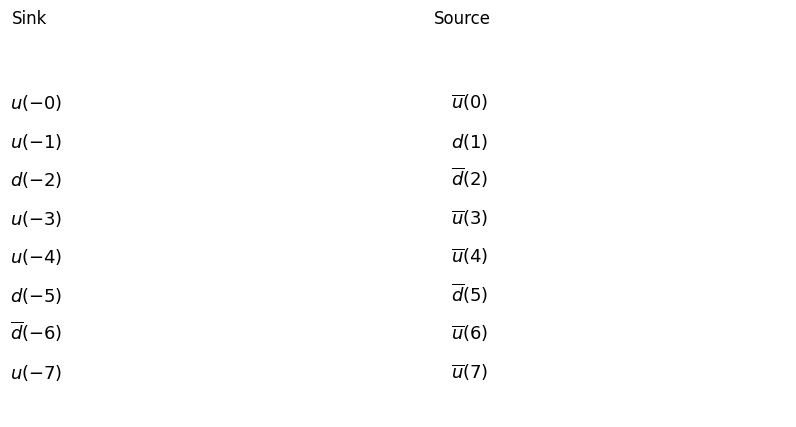

Diagram Number:1  16 [u_quark_propagator(-0|+0) u_quark_propagator(-1|+3) d_quark_propagator(-2|-6) u_quark_propagator(-3|+4) u_quark_propagator(-4|+6) d_quark_propagator(-5|+2) u_quark_propagator(-7|+7) d_quark_propagator(+1|+5)]
Diagram Number:2  -16 [u_quark_propagator(-0|+0) u_quark_propagator(-1|+3) d_quark_propagator(-2|-6) u_quark_propagator(-3|+4) u_quark_propagator(-4|+6) d_quark_propagator(-5|+5) u_quark_propagator(-7|+7) d_quark_propagator(+1|+2)]
Diagram Number:3  8 [u_quark_propagator(-0|+0) u_quark_propagator(-1|+3) d_quark_propagator(-2|-6) u_quark_propagator(-3|+6) u_quark_propagator(-4|+7) d_quark_propagator(-5|+2) u_quark_propagator(-7|+4) d_quark_propagator(+1|+5)]
Diagram Number:4  -8 [u_quark_propagator(-0|+0) u_quark_propagator(-1|+3) d_quark_propagator(-2|-6) u_quark_propagator(-3|+6) u_quark_propagator(-4|+7) d_quark_propagator(-5|+5) u_quark_propagator(-7|+4) d_quark_propagator(+1|+2)]
Diagram Number:5  -16 [u_quark_propagator(-0|+0) u_quark_propagator(-1|+3) d

In [117]:
senken0 = [two_hadron_operator([1/2, 1/2], 1, 1, 'Nucleon', 'Nucleon'), Pip]
quelle0 = [PipB, two_hadron_operatorB([1/2, 1/2], 1, 1, 'Nucleon', 'Nucleon')]
result = Wick_Contractions(senken0, quelle0)
for i, x in enumerate(result):
    print(f"Diagram Number:{i + 1} ", x[0], x[1])